In [3]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Análise exploratória dos dados (EDA)

In [4]:
dados = pd.read_csv("../data/raw/NY-House-Dataset.csv")

In [5]:
# Obtendo uma visão geral do dataset

dados.head()
dados.info()
dados.isna().sum()
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


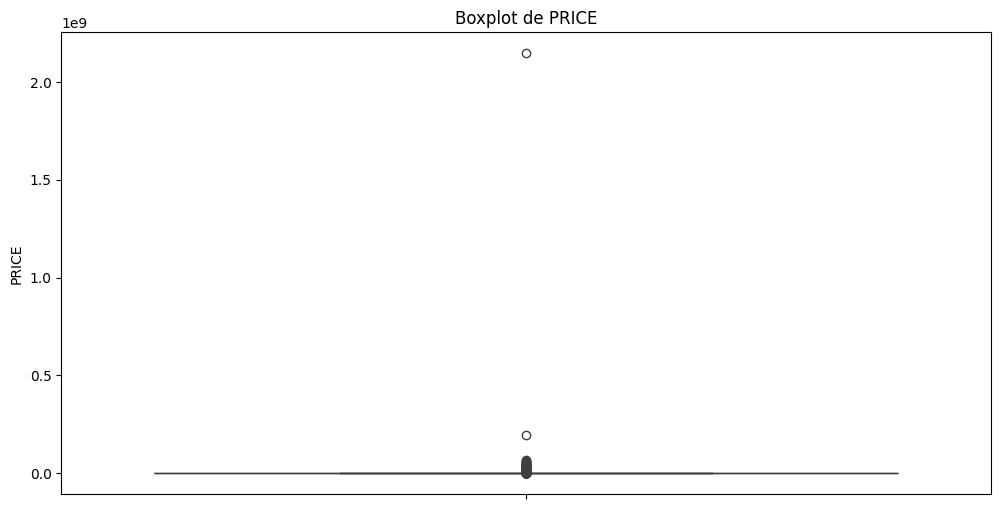

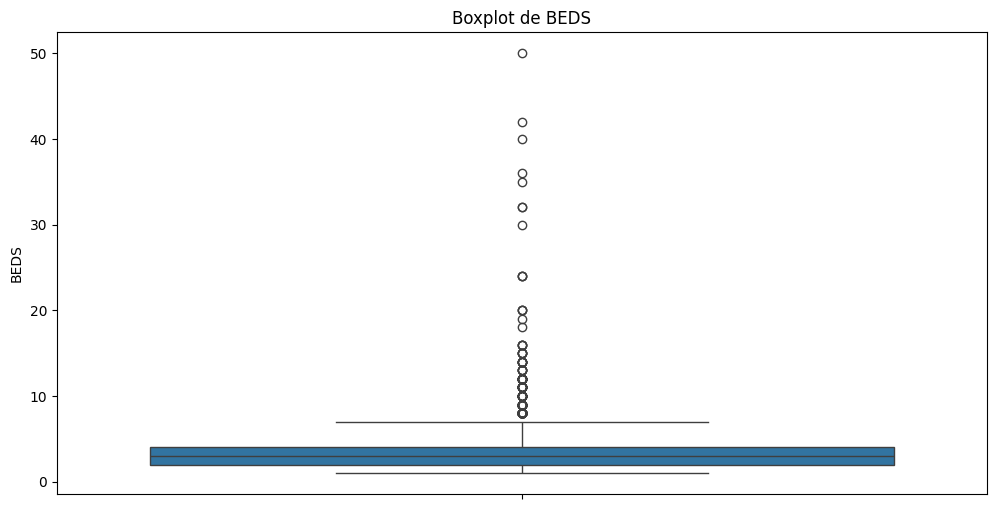

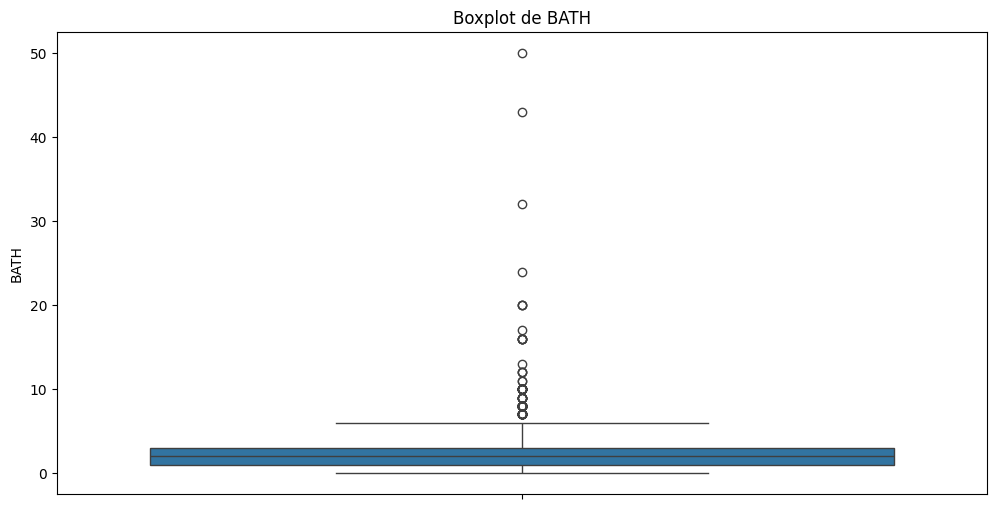

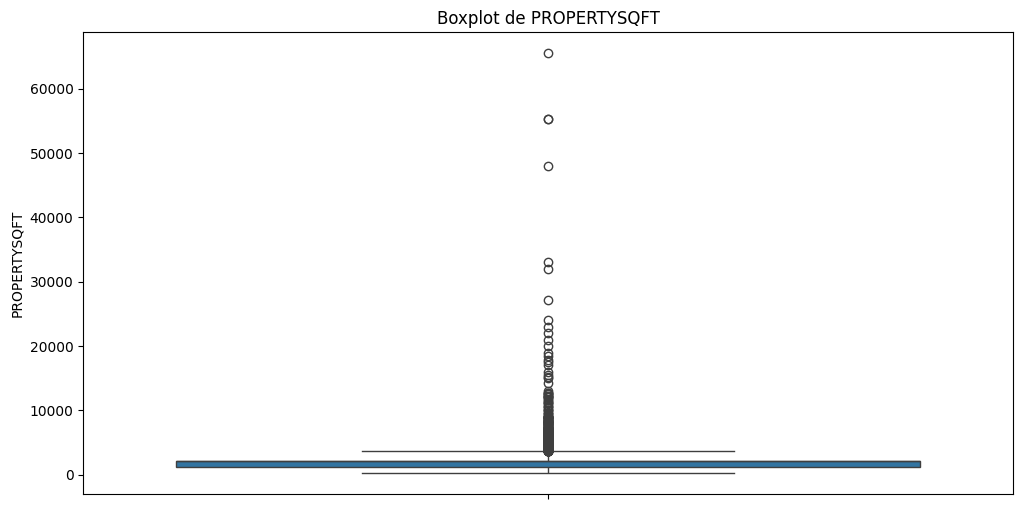

In [4]:
# Analisando possíveis outliers (exceto coluna de latitude e longitude)

# Selecionando apenas colunas numéricas
cols_numericas = dados.select_dtypes(include='number').columns

# excluir longitude e latitude
cols_numericas = cols_numericas.drop(['LONGITUDE', 'LATITUDE'], errors='ignore')

# criar um boxplot para cada coluna
for col in cols_numericas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=dados[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [5]:
# Analisando mais profundamente a coluna 'PRICE' 

dados['PRICE'].describe()

dados.loc[dados['PRICE'] > 1000000].head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.0,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
21,"Brokered by Apaus, Inc",Condo for sale,1300000,2,2.000000,1244.0,10724 71st Rd Apt 9F,"Forest Hills, NY 11375","10724 71st Rd Apt 9FForest Hills, NY 11375",New York,Queens County,Queens,Forest Hills,10724,"10724 71st Rd #9f, Forest Hills, NY 11375, USA",40.720243,-73.843051
22,Brokered by Keller Williams Ny Realty,Multi-family home for sale,1100000,6,3.000000,2837.0,1038 Throggs Neck Expy Unit Sr,"Bronx, NY 10465","1038 Throggs Neck Expy Unit SrBronx, NY 10465",United States,New York,Bronx County,The Bronx,Throgs Neck Expressway,"1038 Throgs Neck Expy, Bronx, NY 10465, USA",40.834394,-73.822110


In [6]:
#Analisando as colunas categóricas

for col in ['TYPE', 'LOCALITY', 'SUBLOCALITY']:
    print(f'\nValores únicos em {col}:')
    display(dados[col].unique())


Valores únicos em TYPE:


array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)


Valores únicos em LOCALITY:


array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)


Valores únicos em SUBLOCALITY:


array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [7]:
# Corrigindo valores errados na coluna 'TYPE'

dados['TYPE'] = dados['TYPE'].replace({'Condop for sale': 'Condo for sale'})
dados['TYPE'].value_counts()


TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 896
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [8]:
# Removendo outlier da coluna 'PRICE'


dados = dados[dados['PRICE'] <= 100000000]
dados.loc[dados['PRICE'].sort_values(ascending=False).head().index]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317
1075,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247
141,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.000000,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,New York,New York County,New York,Riverside Drive,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632


### Nesse momento, separei os dados para BI e prossegui para limpeza dos dados para ML

### Feature Engineering

In [9]:
# Removendo duplicatas baseadas em latitude e longitude

dados = dados.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'])



In [10]:
# Criando features relevantes para o modelo de Machine Learning

dados['PRICE_PER_SQFT'] = dados['PRICE'] / dados['PROPERTYSQFT']
dados['BATHS_PER_BEDS'] = dados['BATH'] / dados['BEDS']
dados['BEDS_PER_SQFT'] = dados['BEDS'] / dados['PROPERTYSQFT']

dados[['PRICE_PER_SQFT', 'BATHS_PER_BEDS', 'BEDS_PER_SQFT']].head()




,PRICE_PER_SQFT,BATHS_PER_BEDS,BEDS_PER_SQFT
0,225.000000,1.000000,0.001429
2,129.032258,0.500000,0.001985
3,155.056180,0.333333,0.006742
4,3880.070547,0.339123,0.000494
5,172.327672,0.400000,0.001249


In [ ]:
# Removendo colunas desnecessárias para o modelo de Machine Learning

dados = dados[['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH', 'BATHS_PER_BEDS', 'BEDS_PER_SQFT', 'TYPE', 'LOCALITY', 'LATITUDE', 'LONGITUDE']]

# Mantendo Latitude e Longitude pensando mais adiante em uma feature engineering

dados.head()

,PRICE,PROPERTYSQFT,BEDS,BATH,BATHS_PER_BEDS,BEDS_PER_SQFT,TYPE,LOCALITY,LATITUDE,LONGITUDE
0,315000,1400.0,2,2.000000,1.000000,0.001429,Condo for sale,New York,40.761255,-73.974483
2,260000,2015.0,4,2.000000,0.500000,0.001985,House for sale,New York,40.541805,-74.196109
3,69000,445.0,3,1.000000,0.333333,0.006742,Condo for sale,New York,40.761398,-73.974613
4,55000000,14175.0,7,2.373861,0.339123,0.000494,Townhouse for sale,New York,40.767224,-73.969856
5,690000,4004.0,5,2.000000,0.400000,0.001249,House for sale,New York,40.674363,-73.958725


In [12]:
dados.LOCALITY.value_counts()

# Após uma breve pesquisa, eu vi que New York é composta por cinco regiões principais, sendo elas: 
# Manhattan, Brooklyn, Queens, The Bronx e Staten Island.
# Portanto, vamos agrupar os dados de LOCALITY nessas cinco regiões principais.


LOCALITY
New York           2346
New York County     809
Queens County       441
Kings County        381
Bronx County        133
Richmond County      42
United States        35
Queens                6
The Bronx             3
Brooklyn              3
Flatbush              1
Name: count, dtype: int64

In [13]:
# Aqui trocamos cada item da primeira lista pelo respectivo item na segunda lista.
dados['LOCALITY'] = dados['LOCALITY'].replace(['New York County','Kings County','Queens County','Bronx County','Richmond County','Flatbush'], 
                                              ['Manhattan','Brooklyn','Queens','The Bronx','Staten Island','Brooklyn'])

dados.LOCALITY.value_counts()

# Isso resolve parte do nosso problema, agora vamos agrupar os demais valores utilizando brevemente o KNN

LOCALITY
New York         2346
Manhattan         809
Queens            447
Brooklyn          385
The Bronx         136
Staten Island      42
United States      35
Name: count, dtype: int64

In [14]:
# Vamos separar os dados entre as entradas que já foram corrigidas e as incorretas que vamos realizar a predição
regioes = ['Manhattan', 'The Bronx', 'Brooklyn', 'Queens', 'Staten Island']

dados_conhecidos = dados.loc[dados['LOCALITY'].isin(regioes)] # Separa os conhecidos
dados_desconhecidos = dados[(dados['LOCALITY'] == 'New York') | (dados['LOCALITY'] == 'United States')] # Separa os que queremos arrumar

In [15]:
X = dados_conhecidos[['LATITUDE', 'LONGITUDE']] # Variáveeis preditoras
y = dados_conhecidos['LOCALITY'] # Variável resposta

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando no esquema 80 20, 80 para treino e 20 para teste.

In [17]:


# Criando o modelo de KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo
knn.fit(X_train, y_train)

# Prevendo
y_pred = knn.predict(X_test)

y_pred = knn.predict(X_test) # Aqui o modelo treinado avalia o conjunto de teste
accuracy = accuracy_score(y_test, y_pred) # Calcula a % de acerto
print("Acurácia:", accuracy)

# A grosso modo, temos por volta de 99% de acurácia, o que é um resultado excelente para o nosso caso.

Acurácia: 0.9917582417582418


In [18]:
X_desconhecido = dados_desconhecidos[['LATITUDE', 'LONGITUDE']] # Variáveis preditoras
localidades_previstas = knn.predict(X_desconhecido) # Aqui nós guardamos o palpite do algoritmo em um vetor

# Nesse momento, substituímos os valores que queríamos arrumar pelo palpite do algoritmo
dados.loc[dados_desconhecidos.index, 'LOCALITY'] = localidades_previstas

dados.LOCALITY.value_counts()

LOCALITY
Manhattan        1094
Queens           1089
Brooklyn         1085
Staten Island     506
The Bronx         426
Name: count, dtype: int64

In [19]:
# Por fim, removemos as colunas de latitude e longitude, que não serão mais necessárias
dados = dados.drop(columns=['LATITUDE', 'LONGITUDE'])
dados.head()

,PRICE,PROPERTYSQFT,BEDS,BATH,BATHS_PER_BEDS,BEDS_PER_SQFT,TYPE,LOCALITY
0,315000,1400.0,2,2.000000,1.000000,0.001429,Condo for sale,Manhattan
2,260000,2015.0,4,2.000000,0.500000,0.001985,House for sale,Staten Island
3,69000,445.0,3,1.000000,0.333333,0.006742,Condo for sale,Manhattan
4,55000000,14175.0,7,2.373861,0.339123,0.000494,Townhouse for sale,Manhattan
5,690000,4004.0,5,2.000000,0.400000,0.001249,House for sale,Brooklyn


In [20]:
# Arredondando BATH

dados['BATH'] = dados['BATH'].round().astype(int)
dados.head()


,PRICE,PROPERTYSQFT,BEDS,BATH,BATHS_PER_BEDS,BEDS_PER_SQFT,TYPE,LOCALITY
0,315000,1400.0,2,2,1.000000,0.001429,Condo for sale,Manhattan
2,260000,2015.0,4,2,0.500000,0.001985,House for sale,Staten Island
3,69000,445.0,3,1,0.333333,0.006742,Condo for sale,Manhattan
4,55000000,14175.0,7,2,0.339123,0.000494,Townhouse for sale,Manhattan
5,690000,4004.0,5,2,0.400000,0.001249,House for sale,Brooklyn


In [21]:
# Por fim, salvamos o dataset para ML

# OBS: Remover a "#" abaixo para salvar o arquivo

# dados.to_csv('NY_House_Dataset_ML.csv', index=False)
